# "Human Learning" with iris data

Can you predict the species of an iris using petal and sepal measurements?

TASKS:
1. Read iris data into a pandas DataFrame, including column names.
2. Gather some basic information about the data.
3. Use groupby, sorting, and/or plotting to look for differences between species.
4. Come up with a set of rules that could be used to predict species based upon measurements.

BONUS: Define a function that accepts a row of data and returns a predicted species.
Then, use that function to make predictions for all existing rows of data.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Task 1

In [64]:
# read the iris data into a pandas DataFrame, including column names
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

df=pd.read_csv('iris.csv')
df





,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


## Task 2

In [68]:
# gather basic information
df.shape
df.head()
df.dtypes
df.describe()
df.species.value_counts()
df.isnull().sum()



,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


## Task 3

In [15]:
# use groupby to look for differences between the species
df.groupby("species")["sepal_length"].mean()
df.groupby("species")["sepal_width"].mean()
df.groupby("species")["petal_length"].mean()
df.groupby("species")["petal_width"].mean()

species
setosa        0.244
versicolor    1.326
virginica     2.026
Name: petal_width, dtype: float64

In [69]:
# use sorting to look for differences between the species
df.sort_values("petal_width")

,sepal_length,sepal_width,petal_length,petal_width,species
32,5.2,4.1,1.5,0.1,setosa
13,4.3,3.0,1.1,0.1,setosa
37,4.9,3.1,1.5,0.1,setosa
9,4.9,3.1,1.5,0.1,setosa
12,4.8,3.0,1.4,0.1,setosa
...,...,...,...,...,...
140,6.7,3.1,5.6,2.4,virginica
114,5.8,2.8,5.1,2.4,virginica
100,6.3,3.3,6.0,2.5,virginica
144,6.7,3.3,5.7,2.5,virginica


In [40]:
# map species to a numeric value so that plots can be colored by category
species_map = {'setosa': 0, 'versicolor': 1, 'virginica': 2}
df['species_numeric']=df['species'].map(species_map)



## Task 4

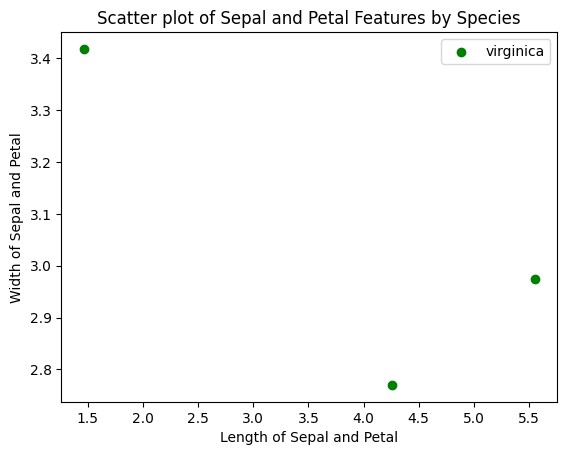

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Load data into a DataFrame
df = pd.read_csv('iris.csv')

# Define a dictionary to map species to numeric values
species_map = {'setosa': 0, 'versicolor': 1, 'virginica': 2}

# Map species to numeric values
df['species_numeric'] = df['species'].map(species_map)

# Extract mean values for each feature
sepal_len = df.groupby('species')['sepal_length'].mean()
sepal_wid = df.groupby('species')['sepal_width'].mean()
petal_len = df.groupby('species')['petal_length'].mean()
petal_wid = df.groupby('species')['petal_width'].mean()

# Define colors for each species
colors = ['red', 'blue', 'green']

# Create a scatter plot
plt.scatter(x=petal_len.values, y=sepal_wid.values, c=colors[2], marker='o', label='virginica')

plt.title('Scatter plot of Sepal and Petal Features by Species')
plt.xlabel('Length of Sepal and Petal')
plt.ylabel('Width of Sepal and Petal')
plt.legend()
plt.show()



## Bonus

In [ ]:
# define function that accepts a row of data and returns a predicted species
def predict_species(row):
    # Create a DataFrame with a single row of data
    data = pd.DataFrame([row], columns=df.columns[:-1])
    # Create feature matrix X by extracting values for each feature
    X = data[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']]
    # Train a decision tree classifier
    clf = DecisionTreeClassifier()
    clf.fit(df[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']], df['species_numeric'])
    # Predict species
    species_numeric = clf.predict(X)
    # Map numeric species back to original species
    predicted_species = species_map_inverse[species_numeric[0]]
    return predicted_species